In [2]:
import pandas as pf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv('uncon_v_con_shock_MR_ROI24_with_covariates.txt',sep='\t')
df.head()

Subj    ROI       Y  TRAITmean  TRAITdiff  STATEmean  STATEdiff  BPdiff_stdz
0  P00  vmPFC  0.0915     -1.003    -0.0406    -1.2307    -0.1812      -0.8664
1  P00   PCC1  0.5290     -1.003    -0.0406    -1.2307    -0.1812      -0.8664
2  P00   PCC2  0.3904     -1.003    -0.0406    -1.2307    -0.1812      -0.8664
3  P00  rPAG1  0.6907     -1.003    -0.0406    -1.2307    -0.1812      -0.8664
4  P00  lPAG1 -0.0709     -1.003    -0.0406    -1.2307    -0.1812      -0.8664

In [6]:
df.drop(['Y','ROI'],axis=1,inplace=True)
df = df.groupby('Subj').mean().reset_index()
df.head()

Subj  TRAITmean  TRAITdiff  STATEmean  STATEdiff  BPdiff_stdz
0  P00    -1.0030    -0.0406    -1.2307    -0.1812      -0.8664
1  P01    -0.4359     3.1472    -0.4379     0.4163       0.3736
2  P02     0.1942     0.3136    -0.5172     0.3167      -0.3028
3  P03    -1.5702     1.0220    -1.6270    -0.0816       0.3360
4  P04    -0.2469    -0.0406    -0.2794     0.6155      -0.7913

## Pairwise correlation values for regs of interest

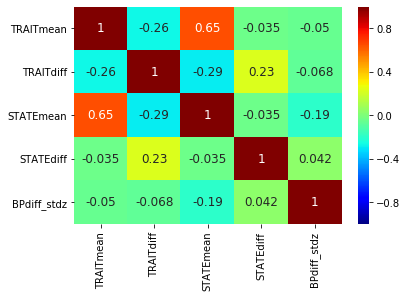

In [11]:
sns.heatmap(df.corr(method="spearman"),vmin=-1,vmax=1,cmap='jet',annot=True,annot_kws={'size':12})

In [12]:
## VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_for_VIF = df.drop('Subj',axis=1).copy()
df_for_VIF = sm.add_constant(df_for_VIF)
VIF_df = pd.DataFrame()
VIF_df['Feature'] = df_for_VIF.columns
VIF_df['VIF'] = [variance_inflation_factor(df_for_VIF.values, i) for i in range(df_for_VIF.shape[1])]
VIF_df[VIF_df['Feature']!='const']

Feature       VIF
1    TRAITmean  1.730677
2    TRAITdiff  1.107800
3    STATEmean  1.846416
4    STATEdiff  1.062236
5  BPdiff_stdz  1.124439

### **First level model**
This a general form
Let $y_{i}$ be raw data from one voxel at timepoint $i$, where $i$ = 1,2,3,...m (m = total number of timepoints).  
$$y_{i} = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}+....+\beta_{n}x_{n} + \epsilon$$ 
Where $n$ = 1,2,3,...,n (n = total number of regressors)  

A subest of $\beta$'s are for the regressors of interest, and remaining are for the nuisance regressors like motions and difts.  

### **Second level model**
Specific to our study.  

$Y_{j}$ be the contrast of shock estimate (uncon-con) in one voxel of pair $j$, where $j$ = 1, 2 , 3..., 61

$$Y_{j} = \beta_{0} + \beta_{SM}SM + \beta_{TM}TM + \beta_{SD}SD + \beta_{TD}TD + \beta_{BPD}BDP + \epsilon$$

This will give us a map for each of the estimated $\beta$.  
Here, maps for $\beta_{0}$, $\beta_{SM}$, and $\beta_{TM}$ are of interest.